# Get County from Geolocation with OpenStreetMap API

## Libraries

In [1]:
import pandas as pd
import requests
import json
from functools import cache
from tqdm import tqdm
import missingno

## Data

In [2]:
df = pd.read_csv("california_housing.csv", sep=";")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Test API call

In [3]:
url = "https://nominatim.openstreetmap.org/reverse?format=geojson&lat=34.19&lon=-114.31"

response = requests.get(url).json()
response

{'type': 'FeatureCollection',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'features': [{'type': 'Feature',
   'properties': {'place_id': 307822437,
    'osm_type': 'relation',
    'osm_id': 396509,
    'place_rank': 12,
    'category': 'boundary',
    'type': 'administrative',
    'importance': 0.5702501726565834,
    'addresstype': 'county',
    'name': 'San Bernardino County',
    'display_name': 'San Bernardino County, California, United States',
    'address': {'county': 'San Bernardino County',
     'state': 'California',
     'ISO3166-2-lvl4': 'US-CA',
     'country': 'United States',
     'country_code': 'us'}},
   'bbox': [-117.8025491, 33.8709844, -114.1307816, 35.8092552],
   'geometry': {'type': 'Point', 'coordinates': [-116.0833144, 34.8253019]}}]}

In [19]:
response = response["features"][0]["properties"]
response["address"]["county"] # Works fine!

'San Bernardino County'

## Functions

In [4]:
@cache # Caching, i.e. using past request results with the same lat and long values, is required by API provider
def bar(lat, long):
    url = "https://nominatim.openstreetmap.org/reverse?format=geojson&lat=" +str(lat)+"&lon="+str(long)
    try:
        response = requests.get(url).json()
        response = response["features"][0]["properties"]
        county = response["address"]["county"]
        return county
    except:
        return None # In case the API call returns an error -> return None

def foo(row):
    return bar(row["latitude"], row["longitude"])

## Execution

In [5]:
tqdm.pandas() # Provide progress overview
df["county"] = df.sample(100).progress_apply(foo, axis=1)

100%|██████████| 100/100 [00:09<00:00, 10.01it/s]


In [6]:
df["county"]

0     San Bernardino County
1     San Bernardino County
2          Riverside County
3          Riverside County
4          Riverside County
              ...          
95          Imperial County
96          Imperial County
97          Imperial County
98          Imperial County
99          Imperial County
Name: county, Length: 100, dtype: object

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,county
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,San Bernardino County
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,San Bernardino County
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,Riverside County
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,Riverside County
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,Riverside County


## Check for missing values

<AxesSubplot:>

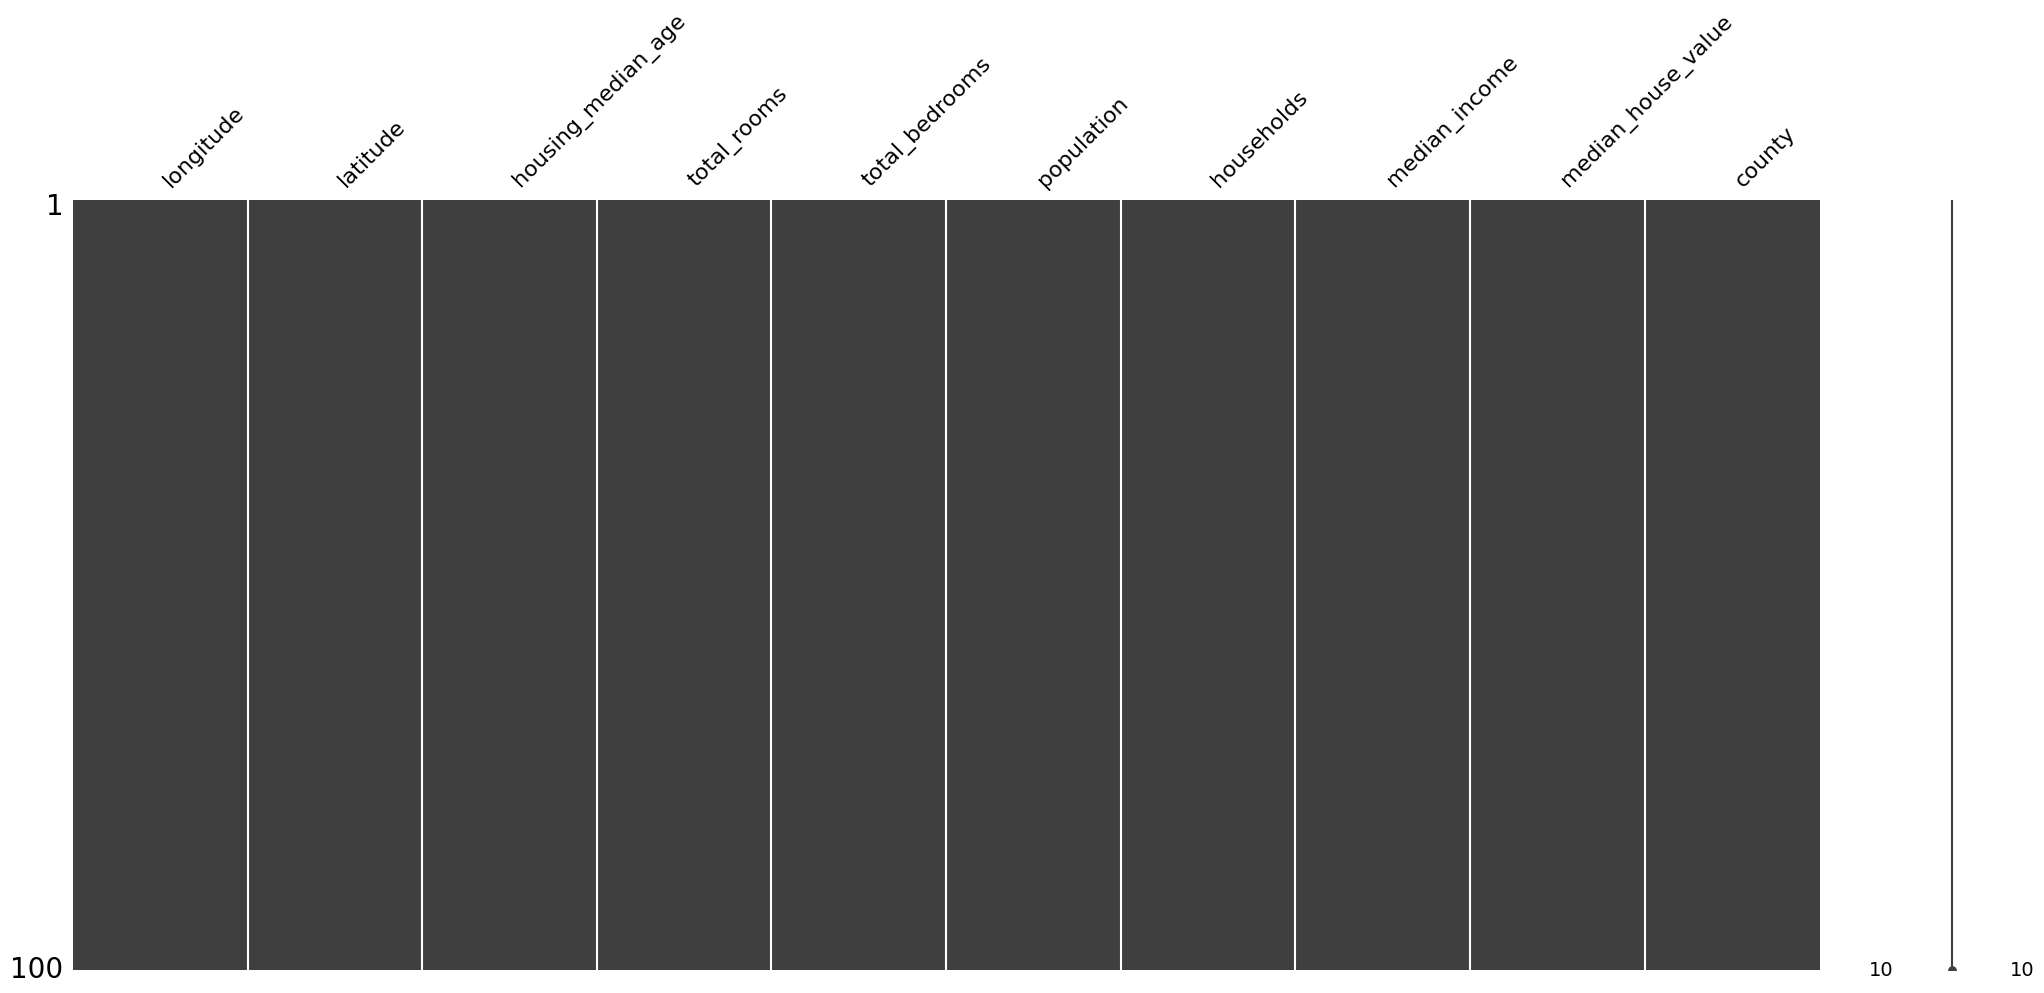

In [8]:
missingno.matrix(df) # Helpful for larger quantities